In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagenerator = ImageDataGenerator(rescale=1./255)

In [92]:
train_set = train_datagenerator.flow_from_directory('./Computer_Vision_Logo_Data/logo_data/data/train',
                                             target_size=(64, 64),
                                             batch_size=32,
                                             class_mode='categorical')

test_set = test_datagenerator.flow_from_directory('./Computer_Vision_Logo_Data/logo_data/data/val',
                                           target_size=(64, 64),
                                           batch_size=32,
                                           class_mode='categorical')


Found 3386 images belonging to 28 classes.
Found 361 images belonging to 28 classes.


In [93]:
from tensorflow import keras
from tensorflow.keras import layers

#Building the artificial neural network

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), #Adding the convolutional layer
    layers.MaxPooling2D((2, 2)), #Adding the max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), #Adding additional layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), #Adding the flattening Layer
    layers.Dense(128, activation='relu'), #Adding the full connection layer
    layers.Dense(28, activation='softmax')  #Adding the output layer; here 28 is the number of logo categories
])

#Compiling our convolutional neural network
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.fit(train_set, epochs=20, validation_data=test_set)

Epoch 1/20
106/106 [==============================] - 14s 129ms/step - loss: 2.1376 - accuracy: 0.4265 - val_loss: 0.9298 - val_accuracy: 0.7535
Epoch 2/20
106/106 [==============================] - 14s 128ms/step - loss: 0.7295 - accuracy: 0.8125 - val_loss: 0.5016 - val_accuracy: 0.8587
Epoch 3/20
106/106 [==============================] - 14s 128ms/step - loss: 0.4644 - accuracy: 0.8813 - val_loss: 0.4915 - val_accuracy: 0.8560
Epoch 4/20
106/106 [==============================] - 14s 127ms/step - loss: 0.3493 - accuracy: 0.9073 - val_loss: 0.4028 - val_accuracy: 0.8837
Epoch 5/20
106/106 [==============================] - 13s 127ms/step - loss: 0.2679 - accuracy: 0.9338 - val_loss: 0.3391 - val_accuracy: 0.9169
Epoch 6/20
106/106 [==============================] - 14s 128ms/step - loss: 0.2064 - accuracy: 0.9436 - val_loss: 0.3200 - val_accuracy: 0.9197
Epoch 7/20
106/106 [==============================] - 13s 126ms/step - loss: 0.1981 - accuracy: 0.9442 - val_loss: 0.2758 - val_ac

In [86]:
#Model Evaluation
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy}")

12/12 [==============================] - 0s 21ms/step - loss: 0.3088 - accuracy: 0.9224
Test Accuracy: 0.9224376678466797


In [87]:
#Saving the model
model.save('vehicle_logo_classifier.h5')

C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
#Using Opencv for inference
import cv2
import numpy as np
from tensorflow import keras

# Load the trained model
model = keras.models.load_model('vehicle_logo_classifier.h5')

# Load the image using OpenCV
image_path1 = './Computer_Vision_Logo_Data/logo_data/data/val/Audi.common/Audi_0ecdf0d4-7356-4b6c-a26b-365fa5c8b80a.jpg_2ac72fa5-f61a-4a9f-916a-9b6bfd680683.jpg'
image_path2 = './Computer_Vision_Logo_Data/logo_data/data/val/BMW.common/BMW_5c755e15-9ee3-4594-b9fa-207173b541a5.jpg_ed1a16fd-de61-45d8-b102-131b5ff3e031.jpg'
image1 = cv2.imread(image_path1)
image1 = cv2.resize(image1, (64, 64))
image1 = image1 / 255.0  # Normalize pixel values
image2 = cv2.imread(image_path2)
image2 = cv2.resize(image2, (64, 64))
image2 = image2 / 255.0  # Normalize pixel values


# Perform inference
predictions1 = model.predict(np.expand_dims(image1, axis=0))
predictions2 = model.predict(np.expand_dims(image2, axis=0))

# Get the class with the highest probability
predicted_class1 = np.argmax(predictions1)
predicted_class2 = np.argmax(predictions2)

# Get the predicted logo class
predicted_logo1 = predicted_class1
predicted_logo2 = predicted_class2

print(f'Predicted Logo 1: {predicted_logo1}')
print(f'Predicted Logo 2: {predicted_logo2}')

1/1 [==============================] - 0s 22ms/step
Predicted Logo 1: 0
Predicted Logo 2: 1


12/12 [==============================] - 0s 21ms/step
Classification Report:
                       precision    recall  f1-score   support

         Audi.common       0.06      0.06      0.06        17
          BMW.common       0.00      0.00      0.00        14
    Chevrolet.common       0.07      0.07      0.07        15
       Datsun.common       0.07      0.07      0.07        15
         Fiat.common       0.07      0.06      0.07        16
         Ford.common       0.00      0.00      0.00        16
        Honda.common       0.00      0.00      0.00        16
      Hyundai.common       0.11      0.10      0.10        21
        ISUZU.common       0.00      0.00      0.00        10
      Jaguar.frontal       0.00      0.00      0.00         8
         Jaguar.rear       0.14      0.17      0.15         6
         Jeep.common       0.08      0.07      0.07        15
          Kia.common       0.00      0.00      0.00        19
             Kia.new       0.00      0.00      0.00  

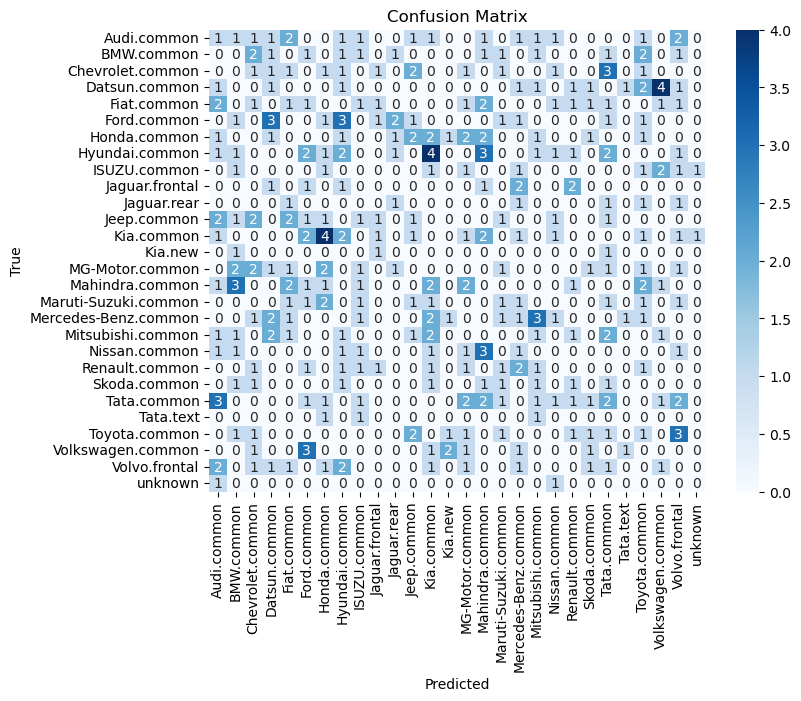

In [90]:
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Perform inference on the test dataset
predictions = model.predict(test_set)
true_classes = test_set.classes

#  Get class predictions
predicted_classes = np.argmax(predictions, axis=1)


# Calculate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=test_set.class_indices.keys())
print("Classification Report:\n", report)

# Calculate and print the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


